In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [11]:
spam_dataset = pd.read_csv('spam_tfidf.csv', index_col=[0])
spam_dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,58
0,0.000000,1.846209,1.472720,0.0,0.719321,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.849699,0.000000,0.000,1
1,0.605787,0.688445,1.258362,0.0,0.324860,0.758411,0.622415,0.186400,0.000000,2.786049,...,0.000000,0.0,0.0,0.000000,0.351496,0.0,1.138615,0.533499,0.048,1
2,0.141709,0.000000,1.573143,0.0,3.764774,0.430333,0.457440,0.302007,2.038868,0.721175,...,0.191144,0.0,0.0,0.023618,0.337741,0.0,0.879262,0.530785,0.010,1
3,0.000000,0.000000,0.000000,0.0,1.627713,0.000000,0.800938,1.867246,0.812652,1.706424,...,0.000000,0.0,0.0,0.000000,0.364811,0.0,0.501811,0.000000,0.000,1
4,0.000000,0.000000,0.000000,0.0,1.651520,0.000000,0.812652,1.928299,0.825484,1.738650,...,0.000000,0.0,0.0,0.000000,0.380397,0.0,0.389435,0.000000,0.000,1


In [12]:
from sklearn.model_selection import train_test_split
X = spam_dataset.drop('58', axis=1)
y = spam_dataset['58']  # colonna che segna se è o meno spam

# 'test_size' è il parametro che ci indica come dividere i dati, nel caso 0.20 significa che il 20% dei dati
# è usato per fare test, mentre l'80% è usato per fare training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
# ora posso fare il training sui dati, useremo un random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFC = RandomForestClassifier(n_estimators=250)
start_time=time.time()
RFC.fit(X_train, y_train)
print('Training time: %f'%(time.time() - start_time))
RFC.score(X_test, y_test)

Training time: 7.381379


0.9500542888165038

In [14]:
start_time=time.time()
y_predict = RFC.predict(X_test)
print('Prediction time: %f'%(time.time() - start_time))
print('Missclassified examples: %d'% (y_test != y_predict).sum())
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict))

Prediction time: 0.294964
Missclassified examples: 46
Accuracy: 0.950


In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[546,  17],
       [ 29, 329]])

la cunfusion matrix serve per vedere in maniera veloce e chiara quante predizioni sono state fatte correttamente e se non è così, cosa è stato predetto al posto del valore vero. Nel nostro caso, in cui guardiamo solo se è spam o meno è poco utile, ma può tornare utile nel caso in cui i dati debbano essere divisi in più classi.

_seaborn_ è una libreria che serve per la visualizzazione dei dati, si basa su matplotlib, e offre una serie di interfacce pre-preparate.
Nel caso seguente ci fa vedere la confusion matrix con dei colori in modo da rencerci subito conto di quante volte sbaglia o meno il RandomForestClissifier usato in precedenza,

Text(33.22222222222222, 0.5, 'Truth')

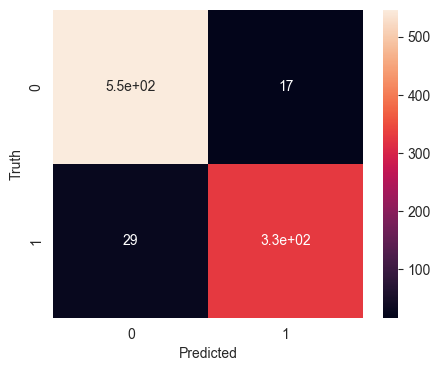

In [16]:
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')